In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/Fliprobo image classification/Images/Train'
valid_path = '/content/drive/MyDrive/Dataset/Fliprobo image classification/Images/Test'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/Fliprobo image classification/Images/Train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Fliprobo image classification/Images/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 924 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Fliprobo image classification/Images/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 276 images belonging to 3 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
29/29 [==============================] - 593s 20s/step - loss: 2.4652 - accuracy: 0.5530 - val_loss: 0.4744 - val_accuracy: 0.8188
Epoch 2/50
29/29 [==============================] - 17s 570ms/step - loss: 0.4157 - accuracy: 0.8604 - val_loss: 0.6180 - val_accuracy: 0.7645
Epoch 3/50
29/29 [==============================] - 17s 570ms/step - loss: 0.2832 - accuracy: 0.8853 - val_loss: 0.2393 - val_accuracy: 0.8949
Epoch 4/50
29/29 [==============================] - 17s 570ms/step - loss: 0.2305 - accuracy: 0.9145 - val_loss: 0.3327 - val_accuracy: 0.8442
Epoch 5/50
29/29 [==============================] - 17s 570ms/step - loss: 0.2200 - accuracy: 0.9134 - val_loss: 0.3542 - val_accuracy: 0.8587
Epoch 6/50
29/29 [==============================] - 16s 565ms/step - loss: 0.1679 - accuracy: 0.9340 - val_loss: 0.2376 - val_accuracy: 0.9130
Epoch 7/50
29/29 [==============================] - 17s 568ms/step - loss: 0.2014 - accuracy: 0.9242 - val_loss: 0.4144 - val_accuracy: 0.8406


In [15]:
import matplotlib.pyplot as plt


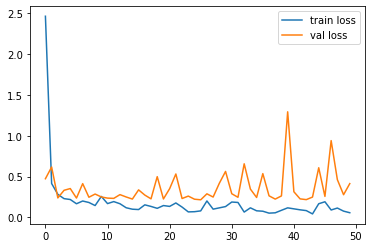

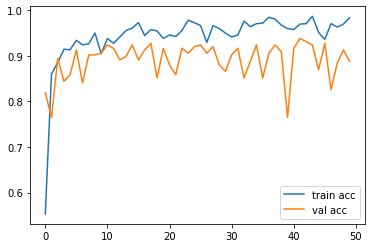

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [18]:
y_pred = model.predict(test_set)

In [19]:
y_pred

array([[7.73446227e-05, 2.85100075e-04, 9.99637485e-01],
       [1.33269833e-13, 1.00000000e+00, 1.27243904e-09],
       [1.28484908e-06, 9.99998689e-01, 5.09960785e-09],
       [1.75331252e-06, 9.98313308e-01, 1.68494449e-03],
       [1.00000000e+00, 1.73676958e-11, 2.06307089e-11],
       [5.10786208e-07, 9.81878102e-01, 1.81213599e-02],
       [3.69343134e-08, 4.28057774e-07, 9.99999523e-01],
       [9.97748648e-05, 9.99889135e-01, 1.10643159e-05],
       [1.18716606e-07, 9.99999881e-01, 1.70797668e-10],
       [1.00000000e+00, 7.14619874e-09, 5.42109456e-12],
       [3.22056359e-09, 4.17129797e-07, 9.99999523e-01],
       [1.39721905e-14, 9.99793351e-01, 2.06674551e-04],
       [1.93021682e-04, 3.07862094e-04, 9.99499083e-01],
       [5.26830844e-14, 2.87682989e-10, 1.00000000e+00],
       [2.21397590e-06, 9.99996066e-01, 1.69879365e-06],
       [4.42484360e-09, 7.47124612e-01, 2.52875447e-01],
       [4.09957712e-09, 2.45651961e-07, 9.99999762e-01],
       [2.27561458e-07, 6.60838

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([2, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 2, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1, 1, 2, 1, 1, 2, 1, 0, 1,
       2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 1, 1,
       0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 2,
       2, 2, 2, 0, 1, 2, 2, 0, 0, 0, 1, 2, 1, 2, 0, 0, 2, 2, 0, 0, 0, 1,
       0, 1, 2, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 2, 1, 1, 2, 1, 0, 1, 0, 2, 2, 2,
       1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0, 2, 0, 1, 0, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1,
       0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 2, 1])

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model_resnet50.h5')

In [24]:
img=image.load_img('/content/drive/MyDrive/Dataset/Fliprobo image classification/Images/Test/Saree/51YxR1jlkyL._AC_UL320_.jpg',target_size=(224,224))

In [25]:
x=image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [26]:
x.shape

(224, 224, 3)

In [27]:
x=x/255

In [28]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [29]:
model.predict(img_data)

array([[0.00363997, 0.85019946, 0.14616059]], dtype=float32)

In [30]:
a=np.argmax(model.predict(img_data), axis=1)

In [31]:
a==1

array([ True])